# Handling Imbalanced Dataset

### Table of Contents
* [1. Cross Validation like KFold](#index1)
* [2. RandomForest Classifier](#index2)
* [3. RandomForest Classifier with classweight](#index3)
* [4. Under Sampling](#index4)
* [5. Over Sampling](#index5)
* [6. SMOTETomek](#index6)
* [7. Easy Ensemble](#index7)

# import necessary columns

In [2]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split , StratifiedKFold

# Explore Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [4]:
# Reading dataset
df = pd.read_csv(path + "/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245800,152914.0,-0.822708,0.545589,-0.160612,0.960993,0.872221,-0.041325,1.914467,-0.376290,-1.177617,...,0.164823,0.698122,-0.330814,-0.330455,0.336398,-0.342331,0.148120,0.091743,215.36,0
274608,166113.0,-0.528021,1.531600,-0.802494,-0.752212,0.909899,-0.783858,0.925789,-0.068083,0.528719,...,-0.445029,-0.934363,0.102363,0.360287,-0.234232,0.138701,0.531709,0.281944,1.79,0
171236,120550.0,1.946132,-0.632944,-1.573519,-0.813163,-0.095948,-0.855922,0.139872,-0.220296,0.903704,...,-0.190804,-0.561822,0.142134,-0.457516,-0.212981,0.446742,-0.105256,-0.070918,79.90,0
268142,163078.0,2.009157,0.117577,-1.788050,1.170309,0.674534,-0.556320,0.507212,-0.216951,0.043888,...,0.067775,0.357187,-0.073485,-0.558880,0.475233,-0.475905,-0.023115,-0.077160,13.99,0
92016,63730.0,-0.834879,0.240716,1.456946,2.720195,1.062730,1.427588,0.472116,0.272602,-0.995423,...,-0.114212,-0.246948,0.095365,-1.170798,-0.114299,0.184928,0.177283,-0.032085,116.55,0


In [7]:
# shape of dataset
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# check on missing Data

In [10]:
# null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
df.isnull().sum().sum()

np.int64(0)

# Check on duplicates

In [12]:
df.duplicated().sum()

np.int64(1081)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

# check on imbalanced data

In [15]:
# Check if it is balanced or not
print("Class Counts:")
print(df['Class'].value_counts())

print("\nClass Percentages:")
print(df['Class'].value_counts(normalize=True) * 100)

Class Counts:
Class
0    283253
1       473
Name: count, dtype: int64

Class Percentages:
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


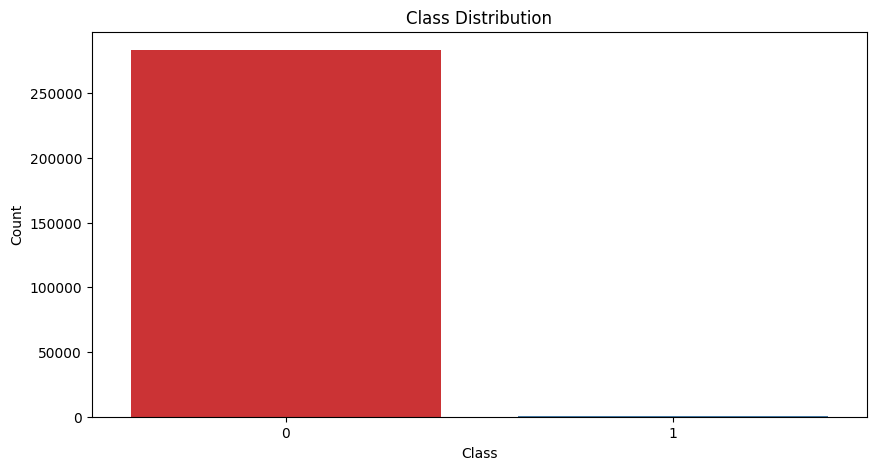

In [16]:
# visualization of the imbalanced dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Class', hue='Class', palette='Set1', legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

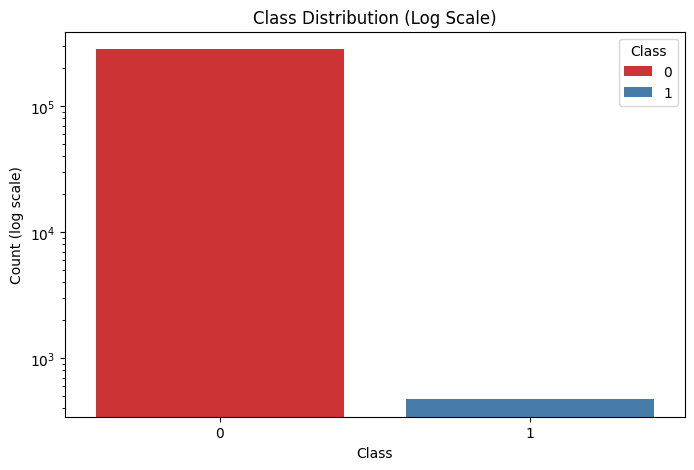

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class',  hue='Class', palette='Set1')
plt.yscale('log')  # Logarithmic scale
plt.title('Class Distribution (Log Scale)')
plt.ylabel('Count (log scale)')
plt.xlabel('Class')
plt.show()

Huge difference between no of 1s and 0s

In [18]:
# create X and Y
X=df.drop('Class', axis=1)
y=df['Class']

In [19]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [20]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


## 1. Cross Validation like KFold <a class="anchor"  id="index1"></a>

In [21]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

In [22]:
# KFold
Model_LR=LogisticRegression()

grid={
    "penalty": ("l1", "l2"),
    "C": (0.001, 0.01, 0.1, 1, 10, 100),
    "solver": ("newton-cg", "lbfgs", "liblinear"),
    "class_weight":[{0:4}]
    }

# Use StratifiedKFold for better class distribution in folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# grid search cv
clf=GridSearchCV(Model_LR, grid, cv=kf, n_jobs=-1, verbose=1 , scoring='f1_macro')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100),
                         'class_weight': [{0: 4}], 'penalty': ('l1', 'l2'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')},
             scoring='f1_macro', verbose=1)

In [24]:
# Best parameters and score
print("Best Parameters:", clf.best_params_)
print("Best Cross-Validated AUC:", clf.best_score_)

Best Parameters: {'C': 1, 'class_weight': {0: 4}, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validated AUC: 0.7776027875951216


1- The F1 score is a measure that balances precision and recall.

2- It is the harmonic mean of precision (the ratio of true positive predictions to the total predicted positives) and recall (the ratio of true positive predictions to the total actual positives).

3-  The f1_macro method computes the F1 score for each class separately and then takes the average (without considering the proportion of samples in each class). This is known as macro-averaging.

4- Macro-averaging treats all classes equally, regardless of their support (the number of instances of each class). It is useful when you want to assess the performance across all classes evenly, without letting the classes with more instances dominate the metric.

In [25]:
# Prediction and scores
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84969     3]
 [   98    48]]
0.9988134119692662
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84972
           1       0.94      0.33      0.49       146

    accuracy                           1.00     85118
   macro avg       0.97      0.66      0.74     85118
weighted avg       1.00      1.00      1.00     85118



Aim is to decrease False Positive = 80 and False Negative = 4

------------

## 2. RandomForest Classifier <a class="anchor"  id="index2"></a>

In [26]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, shuffle= True , stratify= y ,train_size=0.7 , random_state= 54)

In [27]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Prediction and scores
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84968     8]
 [   34   108]]
0.9995065673535563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.93      0.76      0.84       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



1- In KFold FP, FN were 80, 4. Now it has decreased to 24, 6.

2- So Random forest are **not much impacted** by imbalanced dataset. After hyperparameter tuning we will get better result.

-----------------

## 3. RandomForest Classifier with classweight <a class="anchor"  id="index3"></a>

In [29]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, shuffle= True , stratify= y ,train_size=0.7 , random_state= 44)

In [30]:
y_train.value_counts()

,count
Class,
0,198277
1,331


In [31]:
# class weight, give more weight for 1 as no of 1s are less
class_weight=dict({0:1, 1: 100})
class_weight

{0: 1, 1: 100}

In [32]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight='balanced_subsample')
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [33]:
# Prediction and scores
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84970     6]
 [   34   108]]
0.999530064146244
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.76      0.84       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



1- Previously FP, FN was 24, 6, now it is 36, 9 .

2- It has not improved using class-weight.

--------------

## 4. Under Sampling <a class="anchor"  id="index4"></a>

### When to use:
Under-sampling is useful when you have a **large dataset**, and the **majority class significantly dominates** the minority class.

### Advantages:
Helps **reduce the size of the majority class**, making the dataset more balanced.
Can lead to **faster training times**, especially when dealing with large datasets.

### Disadvantages:
**Loss of potentially valuable information** from the majority class.
May **increase the risk of overfitting** on the reduced dataset.

In [34]:
# Installing library
#!pip install imbalanced-learn

In [35]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7,shuffle=True, stratify=y,random_state=34)

In [36]:
# import library
from collections import Counter
from imblearn.under_sampling import NearMiss

In [37]:
# performing fit
ns=NearMiss()

X_res,Y_res=ns.fit_resample(X_train, y_train)

print('NO of class before fit ',Counter(y_train))
print('NO of class after fit ',Counter(Y_res))

NO of class before fit  Counter({0: 198277, 1: 331})
NO of class after fit  Counter({0: 331, 1: 331})


No of 0s are decreased to no of 1s.

In [38]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res, Y_res)

RandomForestClassifier()

In [39]:
# Prediction and scores
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[60208 24768]
 [    5   137]]
0.7089569773725887
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.71     85118
   macro avg       0.50      0.84      0.42     85118
weighted avg       1.00      0.71      0.83     85118



Very bad accuracy, so not preferred.

--------------------

## 5. Over Sampling <a class="anchor"  id="index5"></a>

### When to use:
Over-sampling is beneficial when you have a **small dataset** and the minority class is underrepresented.

### Advantages:
Helps **increase the size of the minority class**, balancing the dataset.
**Mitigates the risk of losing important information** from the majority class.

### Disadvantages:
Can **lead to overfitting**, as it **duplicates the minority class** examples.
May result in **increased training time** due to the larger dataset.

In [40]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, shuffle=True, stratify=y,random_state=24)

In [41]:
# import library
from imblearn.over_sampling import RandomOverSampler

In [42]:
# performing fit
ns=RandomOverSampler()
X_res,Y_res=ns.fit_resample(X_train, y_train)
print('NO of class before fit ',Counter(y_train))
print('NO of class after fit ',Counter(Y_res))

NO of class before fit  Counter({0: 198277, 1: 331})
NO of class after fit  Counter({0: 198277, 1: 198277})


Here no of 1s are increased.

In [43]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res, Y_res)

RandomForestClassifier()

In [44]:
# Prediction and scores
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84969     7]
 [   24   118]]
0.9996357997133392
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.94      0.83      0.88       142

    accuracy                           1.00     85118
   macro avg       0.97      0.92      0.94     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix score has improved now.

-----------------------

## 6. SMOTETomek <a class="anchor"  id="index6"></a>

### When to use:
SMOTETomek is suitable when you want to **address class imbalance** while simultaneously **cleaning noisy or borderline examples**.
It's especially useful when you **suspect that there are noisy samples or overlapping classes** in your dataset.
You might use SMOTETomek when you have a **relatively low-dimensional feature space**.

### Advantages:
It **combines the strengths** of both over-sampling (**SMOTE**) and under-sampling (**Tomek links**) techniques.
**SMOTE generates synthetic examples** for the minority class, making it larger.
Tomek links are used to **remove noisy and borderline examples** that could potentially confuse the classifier.
It helps in **improving the balance of the dataset** while **reducing noise** and potentially enhancing the classifier's performance.

### Disadvantages:
Like SMOTE, the effectiveness of SMOTETomek **can vary based on the dataset's characteristics**.
It may require parameter tuning to balance the trade-off between over-sampling and under-sampling.

In [45]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

In [46]:
# import library
from imblearn.combine import SMOTETomek

In [47]:
# performing fit
ns=SMOTETomek()
X_res,Y_res=ns.fit_resample(X_train, y_train)


In [48]:
# print No of class before and after
print('NO of class before fit ',Counter(y_train))
print('NO of class after fit ',Counter(Y_res))

NO of class before fit  Counter({0: 198260, 1: 348})
NO of class after fit  Counter({0: 197556, 1: 197556})


**It takes more time.**

In [49]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res, Y_res)

RandomForestClassifier()

In [50]:
# Prediction and scores
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84982    11]
 [   19   106]]
0.999647548109683
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.91      0.85      0.88       125

    accuracy                           1.00     85118
   macro avg       0.95      0.92      0.94     85118
weighted avg       1.00      1.00      1.00     85118



-----------------------

## 7. Easy Ensemble <a class="anchor"  id="index7"></a>

### When to use:
Easy Ensemble is a good choice when you have a **highly imbalanced dataset** and you are **willing to invest computational resources** to create balanced subsets.

### Advantages:
Creates **multiple balanced subsets** of the dataset.
**Reduces the risk of overfitting** and **provides robustness**.

### Disadvantages:
Requires **multiple iterations and models**, which can be **computationally expensive**.
**May not be suitable for very large datasets**.

In [51]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7)

In [52]:
# import library
from imblearn.ensemble import EasyEnsembleClassifier

In [53]:
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=42)

In [54]:
# Prediction and scores
y_pred=eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81896  3071]
 [   10   141]]
0.963803190864447
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84967
           1       0.04      0.93      0.08       151

    accuracy                           0.96     85118
   macro avg       0.52      0.95      0.53     85118
weighted avg       1.00      0.96      0.98     85118



# adaptive smote

In [55]:
from imblearn.over_sampling import ADASYN

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=42)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train, y_train)

print('Number of samples before ADASYN:', Counter(y_train))
print('Number of samples after ADASYN:', Counter(y_res_adasyn))

classifier_adasyn = RandomForestClassifier(random_state=42)
classifier_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = classifier_adasyn.predict(X_test)
print("\nConfusion Matrix (ADASYN):")
print(confusion_matrix(y_test, y_pred_adasyn))
print("\nAccuracy Score (ADASYN):")
print(accuracy_score(y_test, y_pred_adasyn))
print("\nClassification Report (ADASYN):")
print(classification_report(y_test, y_pred_adasyn))

Number of samples before ADASYN: Counter({0: 198277, 1: 331})
Number of samples after ADASYN: Counter({1: 198281, 0: 198277})

Confusion Matrix (ADASYN):
[[84961    15]
 [   32   110]]

Accuracy Score (ADASYN):
0.9994478253718367

Classification Report (ADASYN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.77      0.82       142

    accuracy                           1.00     85118
   macro avg       0.94      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118



# smote +  ENN

In [56]:
from imblearn.combine import SMOTEENN

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=42)

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_res_smote_enn, y_res_smote_enn = smote_enn.fit_resample(X_train, y_train)

print('Number of samples before SMOTEENN:', Counter(y_train))
print('Number of samples after SMOTEENN:', Counter(y_res_smote_enn))

classifier_smote_enn = RandomForestClassifier(random_state=42)
classifier_smote_enn.fit(X_res_smote_enn, y_res_smote_enn)

y_pred_smote_enn = classifier_smote_enn.predict(X_test)
print("\nConfusion Matrix (SMOTEENN):")
print(confusion_matrix(y_test, y_pred_smote_enn))
print("\nAccuracy Score (SMOTEENN):")
print(accuracy_score(y_test, y_pred_smote_enn))
print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test, y_pred_smote_enn))

Number of samples before SMOTEENN: Counter({0: 198277, 1: 331})
Number of samples after SMOTEENN: Counter({1: 190020, 0: 181529})

Confusion Matrix (SMOTEENN):
[[84956    20]
 [   30   112]]

Accuracy Score (SMOTEENN):
0.9994125801828051

Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.85      0.79      0.82       142

    accuracy                           1.00     85118
   macro avg       0.92      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118



# smote + borderline

In [57]:
from imblearn.over_sampling import BorderlineSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=42)

# Apply BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
X_res_borderline_smote, y_res_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

print('Number of samples before BorderlineSMOTE:', Counter(y_train))
print('Number of samples after BorderlineSMOTE:', Counter(y_res_borderline_smote))

classifier_borderline_smote = RandomForestClassifier(random_state=42)
classifier_borderline_smote.fit(X_res_borderline_smote, y_res_borderline_smote)

y_pred_borderline_smote = classifier_borderline_smote.predict(X_test)
print("\nConfusion Matrix (BorderlineSMOTE):")
print(confusion_matrix(y_test, y_pred_borderline_smote))
print("\nAccuracy Score (BorderlineSMOTE):")
print(accuracy_score(y_test, y_pred_borderline_smote))
print("\nClassification Report (BorderlineSMOTE):")
print(classification_report(y_test, y_pred_borderline_smote))

Number of samples before BorderlineSMOTE: Counter({0: 198277, 1: 331})
Number of samples after BorderlineSMOTE: Counter({0: 198277, 1: 198277})

Confusion Matrix (BorderlineSMOTE):
[[84972     4]
 [   36   106]]

Accuracy Score (BorderlineSMOTE):
0.999530064146244

Classification Report (BorderlineSMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.75      0.84       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118



# kmeans smote

In [65]:
from imblearn.over_sampling import KMeansSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=42)

# Apply KMeansSMOTE
# kmeans_smote = KMeansSMOTE(random_state=42, cluster_balance_threshold=0.05)
kmeans_smote = KMeansSMOTE(
    random_state=42,
    cluster_balance_threshold=0.01   # smaller than 0.05
)
X_res_kmeans_smote, y_res_kmeans_smote = kmeans_smote.fit_resample(X_train, y_train)

print('Number of samples before KMeansSMOTE:', Counter(y_train))
print('Number of samples after KMeansSMOTE:', Counter(y_res_kmeans_smote))

classifier_kmeans_smote = RandomForestClassifier(random_state=42)
classifier_kmeans_smote.fit(X_res_kmeans_smote, y_res_kmeans_smote)

y_pred_kmeans_smote = classifier_kmeans_smote.predict(X_test)
print("\nConfusion Matrix (KMeansSMOTE):")
print(confusion_matrix(y_test, y_pred_kmeans_smote))
print("\nAccuracy Score (KMeansSMOTE):")
print(accuracy_score(y_test, y_pred_kmeans_smote))
print("\nClassification Report (KMeansSMOTE):")
print(classification_report(y_test, y_pred_kmeans_smote))

RuntimeError: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

# SVM smote

In [62]:
from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, stratify=y, random_state=42)

# Apply SVMSMOTE
svm_smote = SVMSMOTE(random_state=42)
X_res_svm_smote, y_res_svm_smote = svm_smote.fit_resample(X_train, y_train)

print('Number of samples before SVMSMOTE:', Counter(y_train))
print('Number of samples after SVMSMOTE:', Counter(y_res_svm_smote))

classifier_svm_smote = RandomForestClassifier(random_state=42)
classifier_svm_smote.fit(X_res_svm_smote, y_res_svm_smote)

y_pred_svm_smote = classifier_svm_smote.predict(X_test)
print("\nConfusion Matrix (SVMSMOTE):")
print(confusion_matrix(y_test, y_pred_svm_smote))
print("\nAccuracy Score (SVMSMOTE):")
print(accuracy_score(y_test, y_pred_svm_smote))
print("\nClassification Report (SVMSMOTE):")
print(classification_report(y_test, y_pred_svm_smote))

Number of samples before SVMSMOTE: Counter({0: 198277, 1: 331})
Number of samples after SVMSMOTE: Counter({0: 198277, 1: 109191})

Confusion Matrix (SVMSMOTE):
[[84972     4]
 [   39   103]]

Accuracy Score (SVMSMOTE):
0.9994948189572124

Classification Report (SVMSMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.73      0.83       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



# anamoly detection

In [63]:
from sklearn.ensemble import IsolationForest

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

X_train_majority = X_train_ad[y_train_ad == 0]
model_ad = IsolationForest(contamination='auto', random_state=42)
model_ad.fit(X_train_majority)

y_pred_ad = model_ad.predict(X_test_ad)

y_pred_ad = [1 if x == -1 else 0 for x in y_pred_ad]

# Evaluate the model
print("Confusion Matrix (Anomaly Detection):")
print(confusion_matrix(y_test_ad, y_pred_ad))
print("\nAccuracy Score (Anomaly Detection):")
print(accuracy_score(y_test_ad, y_pred_ad))
print("\nClassification Report (Anomaly Detection):")
print(classification_report(y_test_ad, y_pred_ad))

Confusion Matrix (Anomaly Detection):
[[81164  3820]
 [   26   108]]

Accuracy Score (Anomaly Detection):
0.9548156676613643

Classification Report (Anomaly Detection):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84984
           1       0.03      0.81      0.05       134

    accuracy                           0.95     85118
   macro avg       0.51      0.88      0.52     85118
weighted avg       1.00      0.95      0.98     85118

